In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# TIPS-Datensatz

Modellierung des Zusammenhangs zwischen Gesamtrechnungsbetrag und Trinkgeldbetrag per linearer Regression.

In [2]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


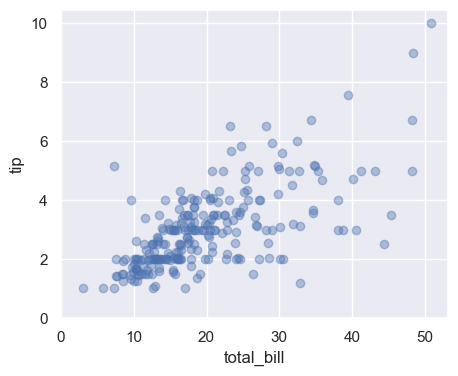

In [3]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(5, 4))
ax.scatter(x=tips["total_bill"], y = tips["tip"], alpha=0.4)
ax.set(xlim=0, ylim = 0, xlabel="total_bill", ylabel="tip") # Graphik inklusive Ursprung
plt.show()

Der Zusammenhang scheint tendenziell linear zu sein, so dass sich eine Modellierung durch lineare Regression anbietet.
Zunächst konstruieren wir eine Instanz der Klasse LinearRegression. 
(ausführliche Dokumentation unter https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html )

In [4]:
model = LinearRegression()

Nun muss man das Modell auf den Trainingsdaten trainieren. 
Hierzu verfügen alle Modelle in `scikit-learn` über eine Funktion `fit()`. 
Dieser Funktion übergibt man im Regelfall die Samples `X` und die zugehörigen Labels `y`.
Üblicherweise handelt es sich bei `X` um eine ganze Matrix der Form `(Anzahl_Samples, Anzahl_Features)` und bei `y` um einen Vektor der Länge `Anzahl_Samples`.

Aus diesem Grund müssen wir unsere Spalte `total_bill`, in eine einspaltige Numpy-Matrix umformen: 

In [5]:
X = tips["total_bill"].values.reshape(-1, 1)
y = tips["tip"]

model.fit(X, y)

LinearRegression()

In [6]:
print(f"Offset: {model.intercept_}")
print(f"Steigung: {model.coef_}")

Offset: 0.9202696135546731
Steigung: [0.10502452]


Wir sehen, dass der Trinkgeldbetrag sich laut Modell als ca. 10% der Gesamtrechnung plus ein knapper Dollar ergibt.

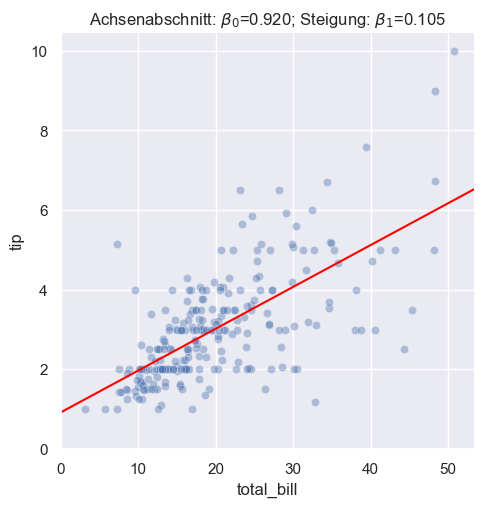

In [7]:
g = sns.relplot(x=tips["total_bill"], y = tips["tip"], alpha=0.4)
g.ax.axline(xy1=(0, model.intercept_), slope=model.coef_[0], color="red")
g.set(xlim = 0, ylim = 0, title = rf"Achsenabschnitt: $\beta_0$={model.intercept_:.3f}; Steigung: $\beta_1$={model.coef_[0]:.3f}")
plt.show()

Das trainierte Modell kann man mittels `predict()` auch direkt zur Verhersage nutzen und auf neue X-Werte ohne Label anwenden. 

In [8]:
X_new = np.array([5, 25, 45]).reshape(-1, 1) # X-Werte ohne Label
model.predict(X_new)

array([1.4453922 , 3.54588255, 5.6463729 ])

Oder man kann für alle Samples (d.h. für alle Originaldaten) die jeweilige Modellprognose berechnen und die Residuen (d.h. die Differenz zum eigentlichen y-Wert) ermitteln.

In [9]:
y_predicted = model.predict(X)
residuals = y - y_predicted

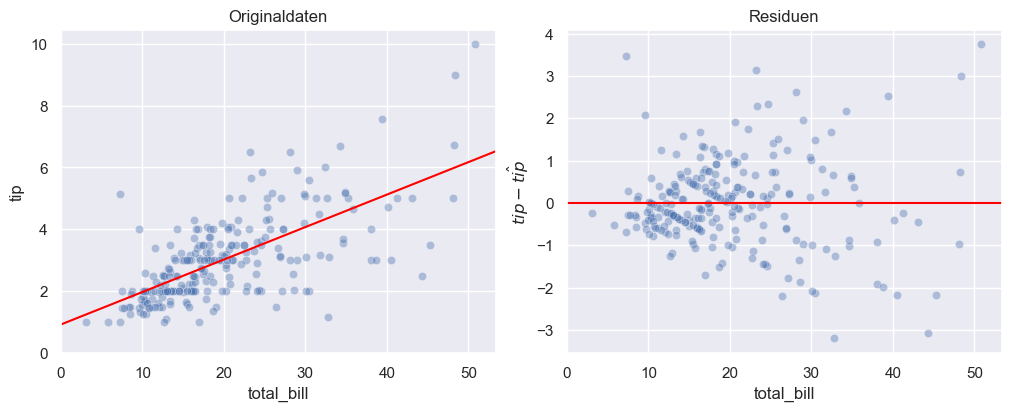

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout = "constrained")

sns.scatterplot(ax = axs[0], x = tips["total_bill"], y = tips["tip"], alpha=0.4)
axs[0].axline((0, model.intercept_), slope=model.coef_[0], color = "red")
axs[0].set(xlim=0, ylim=0, title = "Originaldaten") # Graphik inklusive Ursprung

sns.scatterplot(ax = axs[1],x = tips["total_bill"], y = residuals, alpha=0.4)
axs[1].axline((0, 0), slope=0, color = "red")
axs[1].set(xlim=0, ylabel=r"$tip - \hat{tip}$", title = "Residuen") # Graphik inklusive Ursprung

plt.show()

# Moore's Law

Microprozessordaten von https://en.wikipedia.org/wiki/Transistor_count

In [11]:
microprocessors = pd.read_csv("microprocessors.csv")
microprocessors.head()

microprocessors["transistor_count_log"] = np.log(microprocessors["transistor_count"])
microprocessors.head()

,Processor,transistor_count,year,Designer,Process (nm),Area (mm2),"Transistor density, tr./mm2",transistor_count_log
0,"MP944 (20-bit, 6-chip, 28 chips total)",74442,1970,Garrett AiResearch,?,?,?,11.217776
1,"Intel 4004 (4-bit, 16-pin)",2250,1971,Intel,"10,000 nm",12 mm2,188,7.718685
2,"TMX 1795 (?-bit, 24-pin)",3078,1971,Texas Instruments,?,30.64 mm2,100.5,8.032035
3,"Intel 8008 (8-bit, 18-pin)",3500,1972,Intel,"10,000 nm",14 mm2,250,8.160518
4,"NEC μCOM-4 (4-bit, 42-pin)",2500,1973,NEC,"7,500 nm[19]",?,?,7.824046


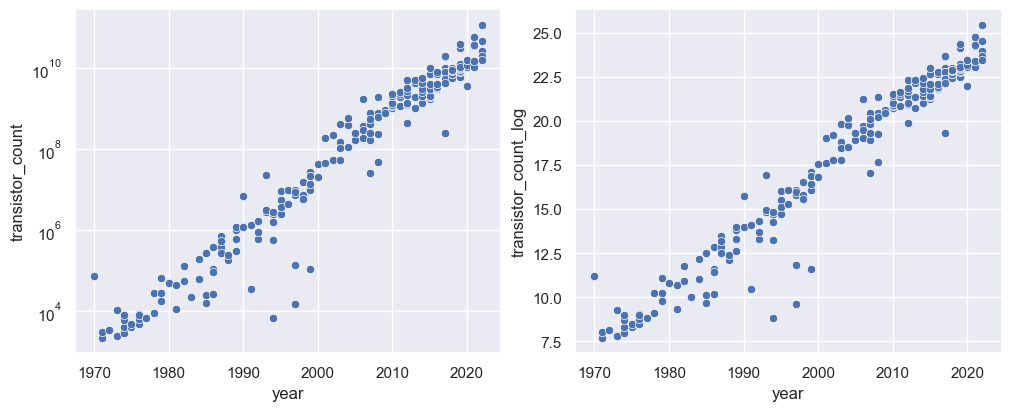

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4), layout="constrained")

sns.scatterplot(ax=axs[0], data=microprocessors, x="year", y="transistor_count")
axs[0].set(yscale="log")

sns.scatterplot(ax=axs[1], data=microprocessors, x="year", y="transistor_count_log")

plt.show()

In [13]:
model_moore = LinearRegression()
model_moore.fit(microprocessors["year"].values.reshape(-1, 1), np.log(microprocessors["transistor_count"]))
print(model_moore.intercept_, model_moore.coef_)

-650.9220318724518 [0.33393854]


Haben soeben die logarithmierten $y$-Werte in Abhängigkeit der $x$-Werte modelliert, d.h.
$$\log(y) = \beta_0 + \beta_1 \cdot x$$

Umformung nach $y$ ergibt:
$$y = e^{\beta_0 + \beta_1 \cdot x} = e^{\beta_0} \cdot e^{\beta_1 \cdot x}$$

Setzt man nun die aus dem Modell gewonnen Parameter für $\beta_0$ und $\beta_1$ ein (insbesondere $\beta_1 \approx 0.334$), so erhält man:
$$ \text{Transistoranzahl} \approx e^{\beta_0} \cdot 1.396^x$$

Das heißt die Transistoranzahl hat pro Jahr im Schnitt um 39.6%, also um ca. 40%, zugenommen.

In [14]:
microprocessors["transistor_count_predicted"] = np.exp(model_moore.predict(microprocessors["year"].values.reshape(-1, 1)))

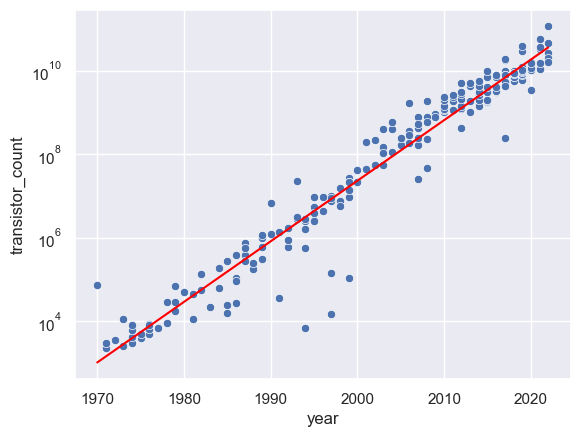

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=microprocessors, x="year", y="transistor_count")
sns.lineplot(ax=ax, data=microprocessors, x = "year", y = "transistor_count_predicted", color = "red")
ax.set(yscale="log")
plt.show()